In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,3)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 14
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df=pd.read_csv('https://media-doselect.s3.amazonaws.com/generic/YKMpgL4avRjQgoPKXoKBgBvy7/Historical_Data.csv'
               ,parse_dates=True,index_col='Date')

In [3]:
#at fi fr se
#chronological order

In [4]:
at=df[df['Country_Code']=='AT']
at=at[['Sold_Units']]

In [5]:
at=at.groupby('Date').count()

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [8]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=52).mean() 
    rolstd = timeseries.rolling(window=52).std()
    #Plot rolling statistics:
    plt.grid(True)
    orig = plt.plot(timeseries, color='tab:blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries)[1]
    print('p_value: ', dftest)

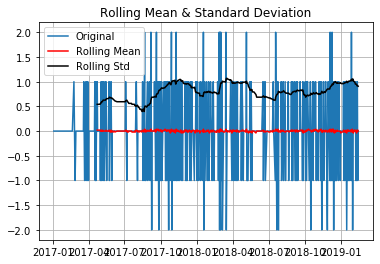

Results of Dickey-Fuller Test:
p_value:  1.2011104193400289e-17


In [9]:
test_stationarity(at.Sold_Units.diff().dropna())
plt.show()

In [10]:
atm=at.Sold_Units.diff()

In [11]:
atm=atm.dropna()

In [12]:

# We will use Akaikan and Bayesian Information Coeffecient to find the lags
order_aic_bic=[]
# Loop over p values 
for p in range(5):
  # Loop over q values 
    for q in range(5):
      	# create and fit ARMA(p,q) model
        try:
            model = ARMA(atm, order=(p, q))
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None)) 

C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignore

In [13]:
order_aic_bic

[(0, 0, 1298.1847640287422, 1306.7530323508838),
 (0, 1, 962.1013135874202, 974.9537160706326),
 (0, 2, 964.014274781295, 981.1508114255781),
 (0, 3, None, None),
 (0, 4, None, None),
 (1, 0, 1141.1268123275086, 1153.979214810721),
 (1, 1, 964.008610291733, 981.1451469360162),
 (1, 2, 964.359231138153, 985.779901943507),
 (1, 3, 965.633970619793, 991.3387755862178),
 (1, 4, 967.6223891333424, 997.611328260838),
 (2, 0, 1086.8863812165976, 1104.0229178608809),
 (2, 1, 965.5102214252104, 986.9308922305644),
 (2, 2, 965.6258821273065, 991.3306870937313),
 (2, 3, 961.7062912886586, 991.6952304161542),
 (2, 4, 954.2818921400379, 988.5549654286043),
 (3, 0, 1061.1448182876563, 1082.5654890930105),
 (3, 1, 967.5099299471598, 993.2147349135846),
 (3, 2, 967.6108640616178, 997.5998031891135),
 (3, 3, 961.391533635501, 995.6646069240674),
 (3, 4, None, None),
 (4, 0, 1037.0586809942138, 1062.7634859606385),
 (4, 1, 969.3151016861734, 999.3040408136691),
 (4, 2, 969.2322007622607, 1003.5052740508

In [14]:
model = ARMA(atm, order=(2, 4))
results = model.fit()

C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [15]:
y_pred=results.predict().tail(10)
y=at.Sold_Units.tail(10)

In [16]:
at.Sold_Units.tail(11)
cum_preds = 2+y_pred.cumsum()

In [17]:
cum_preds
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(y,cum_preds)

In [18]:
cum_preds

Date
2019-02-04    1.869188
2019-02-05    1.405353
2019-02-06    1.289306
2019-02-07   -0.018631
2019-02-08   -0.156481
2019-02-09   -0.402934
2019-02-10    0.348755
2019-02-11    0.170307
2019-02-12   -0.984536
2019-02-13   -1.136109
dtype: float64

In [19]:
y

Date
2019-02-04    2
2019-02-05    2
2019-02-06    3
2019-02-07    2
2019-02-08    2
2019-02-09    1
2019-02-10    2
2019-02-11    3
2019-02-12    2
2019-02-13    2
Name: Sold_Units, dtype: int64

In [20]:
error

1.8615782963104486

In [21]:
#for fi

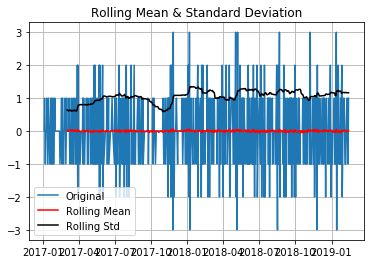

Results of Dickey-Fuller Test:
p_value:  1.841734557809165e-17


In [22]:
at=df[df['Country_Code']=='FI']
at=at[['Sold_Units']]
at=at.groupby('Date').count()
test_stationarity(at.Sold_Units.diff().dropna())
plt.show()
atm=at.Sold_Units.diff()
atm=atm.dropna()


In [23]:
# We will use Akaikan and Bayesian Information Coeffecient to find the lags
order_aic_bic=[]
# Loop over p values 
for p in range(5):
  # Loop over q values 
    for q in range(5):
      	# create and fit ARMA(p,q) model
        try:
            model = ARMA(atm, order=(p, q))
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None)) 

C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignore

In [24]:
order_aic_bic

[(0, 0, 1887.9436647834275, 1896.8759542319028),
 (0, 1, 1513.2698047513882, 1526.668238924101),
 (0, 2, 1513.1750196027094, 1531.0395984996599),
 (0, 3, None, None),
 (0, 4, None, None),
 (1, 0, 1717.408378775435, 1730.8068129481478),
 (1, 1, 1513.0020351134417, 1530.8666140103921),
 (1, 2, 1509.6942566679622, 1532.0249802891503),
 (1, 3, 1511.4255453560818, 1538.2224137015075),
 (1, 4, 1517.3783884676743, 1548.6414015373377),
 (2, 0, 1649.6948559744626, 1667.559434871413),
 (2, 1, 1514.1042640326089, 1536.434987653797),
 (2, 2, 1511.4469933614835, 1538.2438617069092),
 (2, 3, 1513.5110575899753, 1544.7740706596387),
 (2, 4, 1512.0210786022462, 1547.750236396147),
 (3, 0, 1619.2718123862078, 1641.6025360073959),
 (3, 1, 1515.3718727463092, 1542.168741091735),
 (3, 2, 1517.1740949880905, 1548.437108057754),
 (3, 3, 1511.8124045058385, 1547.5415622997393),
 (3, 4, 1509.5971679145005, 1549.792470432639),
 (4, 0, 1583.984152715991, 1610.7810210614168),
 (4, 1, 1517.317219108344, 1548.5802

In [25]:
model = ARMA(atm, order=(0,2))
results = model.fit()
y_pred=results.predict().tail(10)
y=at.Sold_Units.tail(10)
cum_preds = 2+y_pred.cumsum()
cum_preds
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(y,cum_preds)

C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [26]:
# for fr

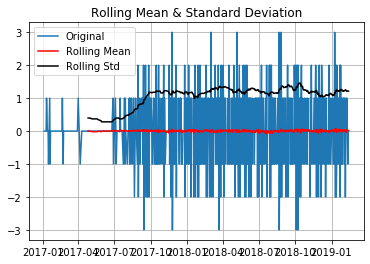

Results of Dickey-Fuller Test:
p_value:  2.9560889590844705e-19


In [27]:
at=df[df['Country_Code']=='FR']
at=at[['Sold_Units']]
at=at.groupby('Date').count()
test_stationarity(at.Sold_Units.diff().dropna())
plt.show()
atm=at.Sold_Units.diff()
atm=atm.dropna()



In [28]:
# We will use Akaikan and Bayesian Information Coeffecient to find the lags
order_aic_bic=[]
# Loop over p values 
for p in range(5):
  # Loop over q values 
    for q in range(5):
      	# create and fit ARMA(p,q) model
        try:
            model = ARMA(atm, order=(p, q))
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None)) 

C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignore

In [29]:
order_aic_bic

[(0, 0, 1865.1809530332405, 1874.0078709475752),
 (0, 1, 1561.3455099530806, 1574.5858868245828),
 (0, 2, 1558.066653987195, 1575.7204898158643),
 (0, 3, None, None),
 (0, 4, None, None),
 (1, 0, 1726.3802631331919, 1739.620640004694),
 (1, 1, 1557.7347684893, 1575.3886043179693),
 (1, 2, 1559.1131595006354, 1581.1804542864722),
 (1, 3, 1559.9501780266785, 1586.4309317696827),
 (1, 4, 1561.9483563949836, 1592.842569095155),
 (2, 0, 1668.9328900779537, 1686.586725906623),
 (2, 1, 1559.395332360467, 1581.4626271463037),
 (2, 2, 1561.1985222024282, 1587.6792759454324),
 (2, 3, 1558.9794197545536, 1589.873632454725),
 (2, 4, 1550.0700551669738, 1585.3777268243127),
 (3, 0, 1635.171398258611, 1657.2386930444477),
 (3, 1, 1561.1463291805023, 1587.6270829235066),
 (3, 2, 1563.1924682271829, 1594.0866809273543),
 (3, 3, 1548.9957914605293, 1584.3034631178682),
 (3, 4, 1550.8195961971207, 1590.5407268116269),
 (4, 0, 1627.7949362328688, 1654.275689975873),
 (4, 1, 1562.4528560070682, 1593.34706

In [30]:
model = ARMA(atm, order=(0,2))
results = model.fit()
y_pred=results.predict().tail(10)
y=at.Sold_Units.tail(10)
print(at.Sold_Units.tail(11))
cum_preds = 4+y_pred.cumsum()
cum_preds
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(y,cum_preds)

C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Date
2019-02-03    4
2019-02-04    5
2019-02-05    3
2019-02-06    3
2019-02-07    3
2019-02-08    4
2019-02-09    5
2019-02-10    5
2019-02-11    4
2019-02-12    4
2019-02-13    4
Name: Sold_Units, dtype: int64


In [31]:
error

1.0611429584470482

In [32]:
#for se

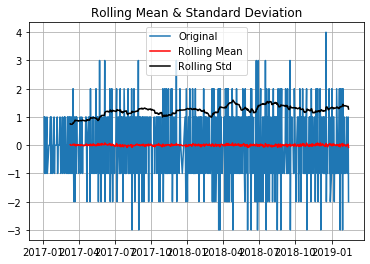

Results of Dickey-Fuller Test:
p_value:  2.5805787217044203e-19


In [33]:
at=df[df['Country_Code']=='SE']
at=at[['Sold_Units']]
at=at.groupby('Date').count()
test_stationarity(at.Sold_Units.diff().dropna())
plt.show()
atm=at.Sold_Units.diff()
atm=atm.dropna()

In [34]:
# We will use Akaikan and Bayesian Information Coeffecient to find the lags
order_aic_bic=[]
# Loop over p values 
for p in range(5):
  # Loop over q values 
    for q in range(5):
      	# create and fit ARMA(p,q) model
        try:
            model = ARMA(atm, order=(p, q))
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p, q, results.aic, results.bic))
        except:
            order_aic_bic.append((p, q, None, None)) 

C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignore

In [35]:
order_aic_bic

[(0, 0, 2252.84408485976, 2261.9376556812813),
 (0, 1, 1920.8503394630325, 1934.4906956953141),
 (0, 2, 1911.8482725625945, 1930.0354142056367),
 (0, 3, None, None),
 (0, 4, None, None),
 (1, 0, 2121.6382752374448, 2135.2786314697264),
 (1, 1, 1912.151033918167, 1930.3381755612093),
 (1, 2, 1913.8356064337029, 1936.5695334875054),
 (1, 3, 1915.5448205357934, 1942.8255330003565),
 (1, 4, 1917.491252271279, 1949.3187501466027),
 (2, 0, 2054.34878194051, 2072.535923583552),
 (2, 1, 1913.8420887411016, 1936.5760157949042),
 (2, 2, 1915.521355174776, 1942.8020676393392),
 (2, 3, 1917.5045504857862, 1949.3320483611099),
 (2, 4, 1915.407600094254, 1951.781883380338),
 (3, 0, 2023.057074271987, 2045.7910013257895),
 (3, 1, 1915.8372982769463, 1943.1180107415094),
 (3, 2, 1917.4980585747312, 1949.3255564500548),
 (3, 3, 1911.636661835516, 1948.0109451216001),
 (3, 4, 1907.8104595913699, 1948.7315282882146),
 (4, 0, 1984.9929047762837, 2012.2736172408468),
 (4, 1, 1917.2751218834658, 1949.102619

In [36]:
model = ARMA(atm, order=(0,2))
results = model.fit()
y_pred=results.predict().tail(10)
y=at.Sold_Units.tail(10)
print(at.Sold_Units.tail(11))
cum_preds = 3+y_pred.cumsum()
cum_preds
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(y,cum_preds)

C:\Users\Cp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Date
2019-02-02    3
2019-02-03    3
2019-02-04    3
2019-02-05    2
2019-02-06    2
2019-02-07    3
2019-02-08    3
2019-02-09    3
2019-02-10    2
2019-02-11    3
2019-02-12    1
Name: Sold_Units, dtype: int64


In [37]:
error

3.024866279235004

In [38]:
output=[error]

In [39]:
output=np.round(output,2)

In [40]:
output

array([3.02])